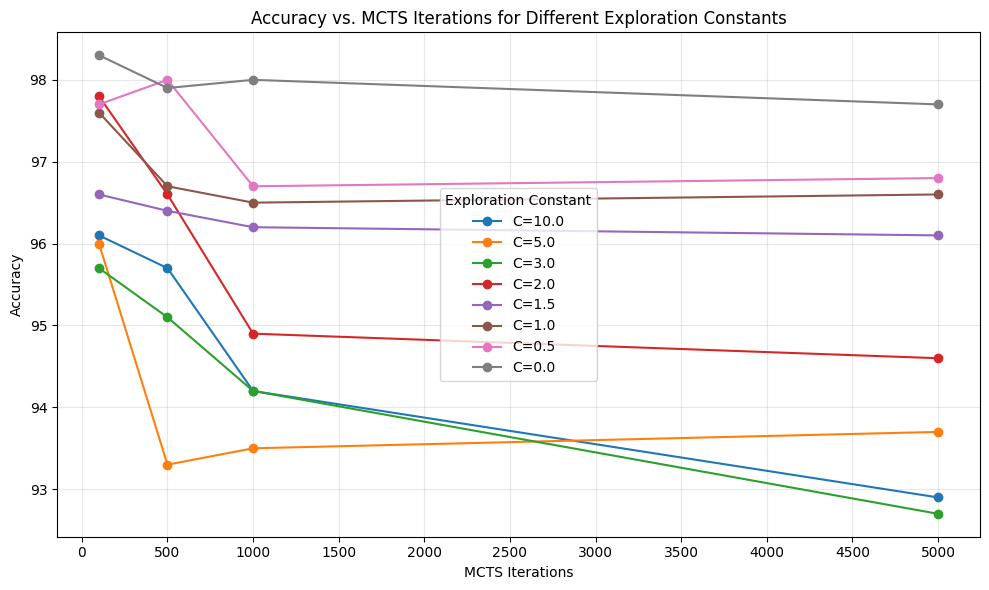

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# factors:
# exploration constant: [0, 0.5, 1.0, 1.5, 2.0, 3.0, 5.0, 10.0]
# number of iterations: [100, 500, 1000, 5000]

file = "data/supervised_mcts_evaluation.csv"
columns = ["exploration_constant", "mcts_iterations", "accuracy"]

data = pd.read_csv(file, usecols=columns)

# Create a single figure
plt.figure(figsize=(10, 6))

# Plot a line for each exploration constant
for constant in data["exploration_constant"].unique():
    df = data[data["exploration_constant"] == constant]
    plt.plot(df["mcts_iterations"], df["accuracy"], marker='o', label=f'C={constant}')

# Add title and labels
plt.title('Accuracy vs. MCTS Iterations for Different Exploration Constants')
plt.xlabel('MCTS Iterations')
plt.ylabel('Accuracy')
# Use linear scale instead of log scale
# Create custom ticks from 0 to 5000 in steps of 500
x_ticks = range(0, 5001, 500)
plt.xticks(x_ticks, [str(tick) for tick in x_ticks])

plt.grid(True, alpha=0.3)
plt.legend(title='Exploration Constant')

# Improve readability
plt.tight_layout()

# Save or show the plot
# plt.savefig('graphs/all_exploration_constants.png')
plt.show()

In [ ]:
'''
ANALYSIS

mcts_iterations - It is interesting that performance seems to get worse when increasing the number of iterations that we run mcts for. This seems couterintuitive as I'd expect that by doing more iterations, we would build a larger tree and so therefore also increase the accuracy of the model.

exploration_constant - This is also interesting, this suggests that using a constant of 0 works the best which would essentially mean we are not exploring at all and pretty much depending on the network entirely to make decisions based on looking at the available moves from the current state. 

I'm excited to look more at this to see if there is a bug or something. It really feels counter intuitive. PUCT may improve performance as well. 

'''

In [ ]:
# Code to generate data. 
# TODO organize the evaluation functions

exploration_constants = [0.0, 0.5, 1.0, 1.5, 2.0, 3.0, 5.0, 10.0]
mcts_iterations = [100, 500, 1000, 5000]


columns = ["exploration_constant", "mcts_iterations", "accuracy"]
data = []

for exploration_constant in reversed(exploration_constants):
    for iterations in reversed(mcts_iterations):
        print(
            f"Evaluating with exploration_constant={exploration_constant}, iterations={iterations}"
        )
        num_samples = 1_000
        accuracy = evaluate_supervised_mcts_on_test_data(
            num_samples=num_samples,
            mcts_iterations=iterations,
            exploration_constant=exploration_constant,
        )
        data.append([exploration_constant, iterations, accuracy])

# save as a CSV file
df = pd.DataFrame(data, columns=columns)
df.to_csv("data/supervised_mcts_evaluation.csv", index=False)
print("Evaluation results saved to supervised_mcts_evaluation.csv")